# Create DA Bid Function Plots
---

In [1]:
import sys, os
import re

print(os.getcwd())
sys.path.append(os.path.realpath('.'))
sys.path.append(os.path.join(os.path.expanduser('~'), 'bnelearn'))
sys.path.append(os.path.join(os.path.expanduser('~'), 'projects/bnelearn'))

import torch
import matplotlib.pyplot as plt
import numpy as np

from bnelearn.experiment.configuration_manager import ConfigurationManager
from bnelearn.strategy import NeuralNetStrategy
from bnelearn.experiment.equilibria import (
    bne_bilateral_bargaining_uniform_linear,
    bne_bilateral_bargaining_uniform_symmetric)
colors = [(0/255.,150/255.,196/255.),(248/255.,118/255.,109/255.),
              (150/255.,120/255.,170/255.),(255/255.,215/255.,130/255.),
              (0/255.,150/255.,196/255.),(248/255.,118/255.,109/255.),
              (150/255.,120/255.,170/255.),(255/255.,215/255.,130/255.)
              ]
markers = ['v', '^', "<", "s"]

linestyles = ["-", "--", "-.", ":",
              (0, (1, 10)), (0, (1, 1)), (0, (5, 10)), (0, (5, 1)),
              (0, (3, 10, 1, 10)), (0, (3, 1, 1, 1)),
              (0, (3, 10, 1, 10, 1, 10)), (0, (3, 1, 1, 1, 1, 1))]

/home/kohring/bnelearn/notebooks/Double Auctions
BNE envs have been set up.


### A. Load models

In [2]:
# exp-5 plot
# dir_path = "/home/kohring/bnelearn/experiments/debug/exp-5-3_experiment/double_auction/single_item/k_price/0.5/uniform/symmetric/risk_1.0/4b1s/2022-01-25 Tue 19.02/02 19:57:17 2/models"
# exp7 plot
dir_path = "/home/kohring/bnelearn/experiments/debug/exp-7-3_experiment/double_auction/single_item/k_price/0.5/uniform/symmetric/risk_1.0/4b4s/2022-01-25 Tue 19.03/01 20:27:50 1/models"
models = list()
for file in os.listdir(dir_path):
    if file.endswith(".pt"):
        model_path = dir_path + '/' + file
        models.append(NeuralNetStrategy.load(model_path))
print(f'Found and loaded {len(models)} models in path.')

Found and loaded 2 models in path.


In [3]:
model_names = ['buyer', 'seller']

### B. Load BNEs

In [4]:
experiment_config = \
    ConfigurationManager(
        experiment_type='double_auction_single_item_uniform_symmetric',
        n_runs=1,  # repeat exp. for different random seeds
        n_epochs=0,
    )
experiment_config.setting.k = 0.5
experiment_config.setting.n_buyers = 1
bne_strategies = [bne_bilateral_bargaining_uniform_linear(experiment_config, 0, 1)]
bne_strategies += bne_bilateral_bargaining_uniform_symmetric(experiment_config)


In [5]:
bne_names = ['linear', '0.25', '0.45']

### C. Plot

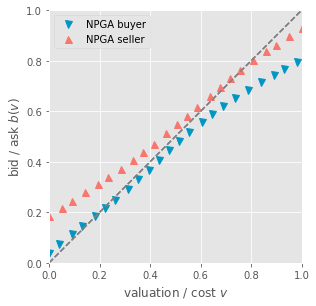

In [6]:
v = torch.linspace(0, 1, 100).view(-1, 1)

plt.style.use("ggplot")
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.add_subplot(111)

for i, model in enumerate(models):
    learned_bid = model.play(v).detach()
    plt.plot(
        v.numpy(), learned_bid.numpy(),
        markers[i], #linestyle='--', 
        markersize=7, markevery=.04,
        label=f'NPGA {model_names[i]}',
        color=colors[i])
    # for j, bne_strategy in enumerate(bne_strategies):
    #     bne_bid = bne_strategy(v, i)
    #     plt.plot(
    #         v.numpy(), bne_bid.numpy(), '--',
    #         label=f'BNE {model_names[i]} {bne_names[j]}',
    #         color=colors[i+j])
    plt.plot(
        v.numpy(), v.numpy(),
        '--', markersize=7,
        color='grey')
plt.xlabel('valuation / cost $v$'); plt.ylabel('bid / ask $b(v)$')
plt.xlim([0, 1]); plt.ylim([0, 1])
plt.legend(); plt.tight_layout()
ax.set_aspect(1)
plt.savefig('exp-7-3_figure_4buyers_4sellers.pdf'); plt.show()

In [7]:
# Plot symmetric equilibrium strategies
all_g_05s = [0.25, 3./8., 0.45]
suboptimal_strategies = bne_bilateral_bargaining_uniform_symmetric(experiment_config, list(all_g_05s))
suboptimal_bne_names = [str(np.round(value, 3)) for value in all_g_05s]

In [8]:
v = torch.linspace(0, 1, 350).view(-1, 1)
figure_plt = plt.figure(figsize=(4.5, 4.5))
ax = fig.add_subplot(111)
plt.style.use('ggplot')
for i in [0, 1]:
    for j, bne_strategy in enumerate(suboptimal_strategies):
        bne_bid = bne_strategy(v, i)
        plt.plot(
            v.numpy(), bne_bid.numpy(),
            label=model_names[i] + ' $g_{sym} = $' + suboptimal_bne_names[j],
            color=color_list[4*i + j], marker=markers[i], markevery=30,
            linestyle='--')
plt.xlabel('valuation / cost $v$'); plt.ylabel('bid / ask $b(v)$')
plt.xlim([0, 1]); plt.ylim([0, 1])
plt.legend(ncol=2, loc='lower center', prop={'size': 9}); plt.tight_layout()
ax.set_aspect(1)
plt.savefig('sub_optimal_bne_strategies.pdf'); plt.show()

NameError: name 'color_list' is not defined

<Figure size 324x324 with 0 Axes>